<a href="https://colab.research.google.com/github/PrabhatRajput001/Mobile-Price_Range_Prediction/blob/main/Mobile_price_prediction_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individually
**Name** - Prabhat Rajput

# **Project Summary -**

The goal of the mobile pricing range prediction project is to develop reliable prediction models by utilizing machine learning. By examining the characteristics and specifications of mobile devices, these models seek to estimate their price range. The project includes a thorough workflow that includes model selection, hyperparameter tweaking, model training and evaluation, and data gathering. Its main goal is to offer insightful analysis and forecasts that might help with strategic pricing and marketing choices in the intensely competitive mobile device market.

A mobile device's brand, model, display size, camera specifications, CPU, storage, RAM, battery capacity, user reviews, and other crucial information are first gathered. Preprocessing on this raw data is rigorous and includes addressing missing values, feature engineering, and data normalization.

With the improved dataset at hand, a variety of machine learning techniques are used, including support vector machines (SVM), decision trees, random forests, logistic regression, and K-nearest neighbors (KNN). Using performance indicators including accuracy, F1 score, precision, recall, and cross-validation, these models are painstakingly trained and evaluated.

Additionally, methods for hyperparameter adjustment are used to improve model performance. Hyperparameters including learning rate, regularization strength, maximum tree depth, number of neighbors in KNN, and kernel type in SVM are optimized using these methods.

The most efficient model(s) are chosen based on the evaluation results and are ready to generate price range estimates for new mobile devices based on their special features. For developing pricing strategies, predicting sales, segmenting markets, and conducting competitive studies, these projections are useful resources.

The project is completed with a thorough summary that summarizes the performance and correctness of the selected model(s). Additionally, it offers doable suggestions for utilizing the outcomes of predictions to accomplish broad corporate goals. It is interesting that factors other than accuracy are taken into account when evaluating model performance.

In essence, the initiative uses machine learning's power to provide insightful insights and forecasts, enabling wise decision-making in the intensely competitive world of mobile devices.

# **GitHub Link -**

https://github.com/PrabhatRajput001/Mobile-Price_Range_Prediction

# **Problem Statement**


The primary objective of the project is to provide incisive analyses and forecasts that can assist decision-makers in the mobile device industry in making well-informed decisions about pricing and marketing strategies. By precisely estimating the price range of mobile devices based on their features and specifications, businesses are able to make informed decisions on their pricing strategy, sales forecasting, market segmentation, competitive analysis, and customer relationship management. By doing this, businesses can boost their revenue and profitability while retaining their competitiveness in the market. The ultimate objective of the project is to give businesses in the mobile device industry a competitive edge by applying machine learning techniques to make more accurate and data-driven decisions.

# ***Let's Begin !***

***1. Know Your Data***

### Import Libraries

In [ ]:
# Import all the libraries related to python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import all the libraries related to sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Importing libraries for building classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importing evaluation metrics libraries for classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')


# **Data Mounting**

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# File path for mounting
file_path = '/content/drive/MyDrive/AlmaBetter/Mobile_price_prediction/dataset/data_mobile_price_range.csv'
df = pd.read_csv(file_path)

Variables Description
•	battery_power->   Battery Capacity in MAh

•	blue->   Has Bluetooth or not

•	clock_speed->    Speed at which microprocessor executes instructions

•	dual_sim->    Has dual sim support or not

•	fc->    Front camera magapixels

•	four_g->    Has 4g or not

•	int_memory->    Internal memory capacity

•	m_dep->   mobile depth in cm

•	mobile_wt->   Weight of mobile phone

•	n_cores->   Number of cores in processor

•	pc->   Primary camera magapixels

•	px_height->   Pixels resolution height

•	px_width->   Pixel resolution width

•	ram->   Random Access Memory in MB

•	sc_h->   Screen Height

•	sc_w->    Screen Width

•	talk_time->   Longest that a single battery can last over a call

•	three_g->    Has 3g or not

•	touch_screen->    phone have touchscreen or keypad

•	wifi->   Has wifi or not

•	price_range->   This is the target variable with a value of 0 (low cost), 1
(medium cost), 2 (high cost), and 3 (very high cost)


### Dataset View

In [ ]:
# first view of dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# last five rows of the dataset
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Row and Column Counting

In [ ]:
# data structure
df.shape

(2000, 21)

There is 21 column and 2000 line in the dataset.

### Columnns

In [ ]:
# columns of the dataset
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dictionary for renaming columns in a decent way
df.rename(columns={
    'battery_power': 'Battery Power','blue': 'Bluetooth','clock_speed': 'Clock Speed','dual_sim': 'Dual SIM','fc': 'Front Camera',
    'four_g': '4G','int_memory': 'Internal Memory','m_dep': 'Mobile Depth','mobile_wt': 'Mobile Weight','n_cores': 'Number of Cores','pc': 'Primary Camera',
    'px_height': 'Pixel Height','px_width': 'Pixel Width','ram': 'RAM','sc_h': 'Screen Height','sc_w': 'Screen Width','talk_time': 'Talk Time',
    'three_g': '3G','touch_screen': 'Touch Screen','wifi': 'WiFi','price_range': 'Price Range'},inplace = True)


### Dataset Information

In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Battery Power    2000 non-null   int64  
 1   Bluetooth        2000 non-null   int64  
 2   Clock Speed      2000 non-null   float64
 3   Dual SIM         2000 non-null   int64  
 4   Front Camera     2000 non-null   int64  
 5   4G               2000 non-null   int64  
 6   Internal Memory  2000 non-null   int64  
 7   Mobile Depth     2000 non-null   float64
 8   Mobile Weight    2000 non-null   int64  
 9   Number of Cores  2000 non-null   int64  
 10  Primary Camera   2000 non-null   int64  
 11  Pixel Height     2000 non-null   int64  
 12  Pixel Width      2000 non-null   int64  
 13  RAM              2000 non-null   int64  
 14  Screen Height    2000 non-null   int64  
 15  Screen Width     2000 non-null   int64  
 16  Talk Time        2000 non-null   int64  
 17  3G            

There is no catigorical column in the dataset.

### Dataset Description

In [ ]:
# numerical description of the dataset
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Battery Power,2000.0,1238.52,439.42,501.0,851.75,1226.0,1615.25,1998.0
Bluetooth,2000.0,0.50,0.50,0.0,0.00,0.0,1.00,1.0
Clock Speed,2000.0,1.52,0.82,0.5,0.70,1.5,2.20,3.0
Dual SIM,2000.0,0.51,0.50,0.0,0.00,1.0,1.00,1.0
Front Camera,2000.0,4.31,4.34,0.0,1.00,3.0,7.00,19.0
4G,2000.0,0.52,0.50,0.0,0.00,1.0,1.00,1.0
Internal Memory,2000.0,32.05,18.15,2.0,16.00,32.0,48.00,64.0
Mobile Depth,2000.0,0.50,0.29,0.1,0.20,0.5,0.80,1.0
Mobile Weight,2000.0,140.25,35.40,80.0,109.00,141.0,170.00,200.0
Number of Cores,2000.0,4.52,2.29,1.0,3.00,4.0,7.00,8.0


#*Data Wrangling*

 ***Check Duplicate and Null values***

In [ ]:
# Check the null values in each features
df.isnull().sum()

Battery Power      0
Bluetooth          0
Clock Speed        0
Dual SIM           0
Front Camera       0
4G                 0
Internal Memory    0
Mobile Depth       0
Mobile Weight      0
Number of Cores    0
Primary Camera     0
Pixel Height       0
Pixel Width        0
RAM                0
Screen Height      0
Screen Width       0
Talk Time          0
3G                 0
Touch Screen       0
WiFi               0
Price Range        0
dtype: int64

There is no null value in the dataset.

In [ ]:
# Check the duplicates
df.duplicated().sum()

0

There is no duplicate data present in the dataset.

***Columns unique value count***

In [ ]:
# count the unique value of every features
for i in df.columns:
  print(f'Number of unique values in {i} is {df[i].nunique()}.')

Number of unique values in Battery Power is 1094.
Number of unique values in Bluetooth is 2.
Number of unique values in Clock Speed is 26.
Number of unique values in Dual SIM is 2.
Number of unique values in Front Camera is 20.
Number of unique values in 4G is 2.
Number of unique values in Internal Memory is 63.
Number of unique values in Mobile Depth is 10.
Number of unique values in Mobile Weight is 121.
Number of unique values in Number of Cores is 8.
Number of unique values in Primary Camera is 21.
Number of unique values in Pixel Height is 1137.
Number of unique values in Pixel Width is 1109.
Number of unique values in RAM is 1562.
Number of unique values in Screen Height is 15.
Number of unique values in Screen Width is 19.
Number of unique values in Talk Time is 19.
Number of unique values in 3G is 2.
Number of unique values in Touch Screen is 2.
Number of unique values in WiFi is 2.
Number of unique values in Price Range is 4.


## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

***Chart 1.***

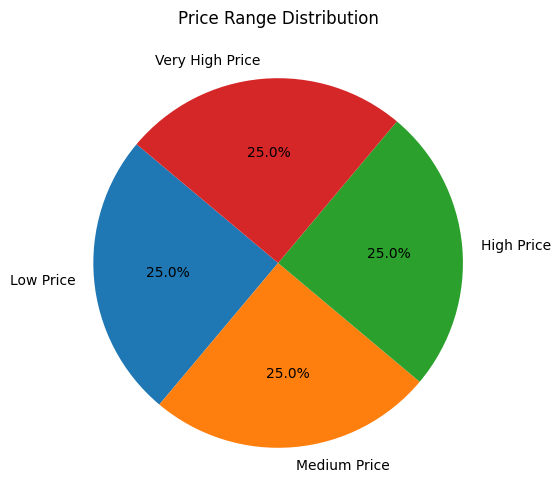

In [ ]:
# Calculate the share of every price range in the DataFrame
price_range_share = df['Price Range'].value_counts().reset_index()
price_range_share.columns = ['Price Range', 'Counts']

# Labels for the pie chart
labels = ['Low Price', 'Medium Price', 'High Price', 'Very High Price']

# Create a pie plot
plt.figure(figsize=(6,6))
plt.pie(price_range_share['Counts'], labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title to the pie chart
plt.title('Price Range Distribution')

# Display the pie chart
plt.show()


**1. Why did you pick the specific chart?**

The pie chart was chosen because it effectively shows the proportion of data categories. Its circular representation with different colors allows for quick comparison of percentages.

**2. What is/are the insight(s) found from the chart?**

The target variable is equally distributed with a quantity of 25 percent for each category, ensuring an equal distribution among the different classes.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from this chart can positively impact the business by revealing crucial factors influencing the price range of mobile devices. It also helps identify potential areas for differentiation and gaining a competitive edge. Fortunately, there are no negative insights that could lead to negative growth.

***Chart 2.***

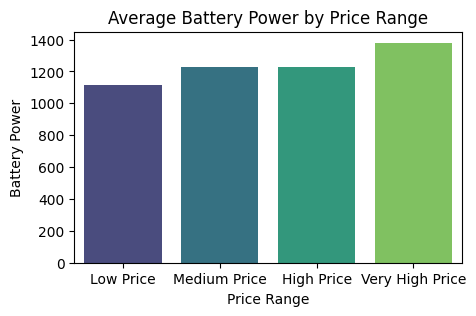

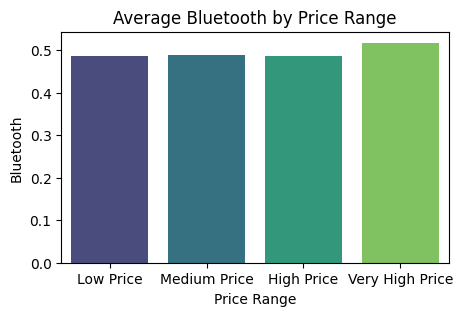

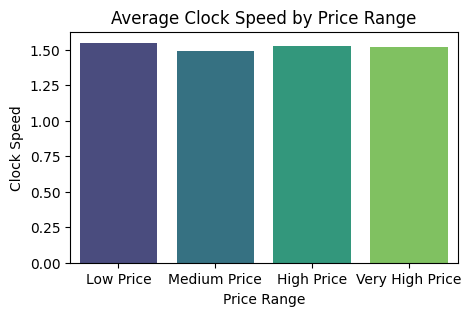

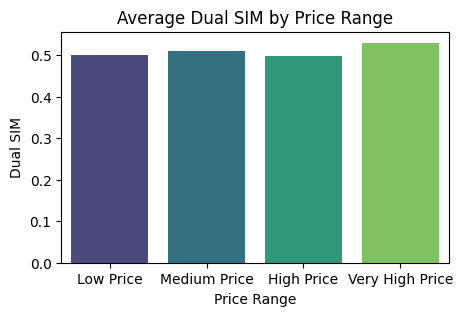

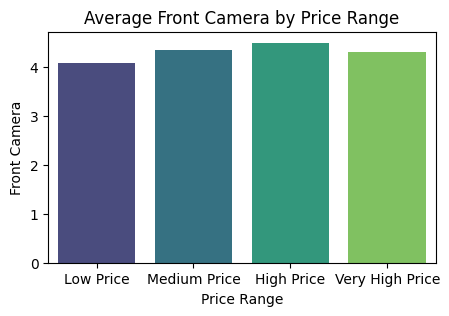

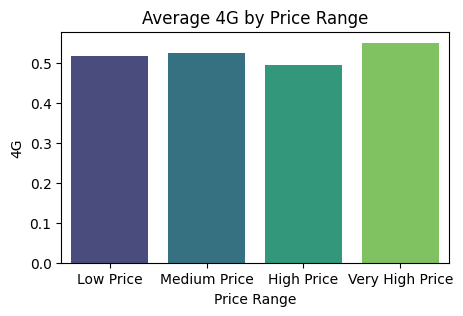

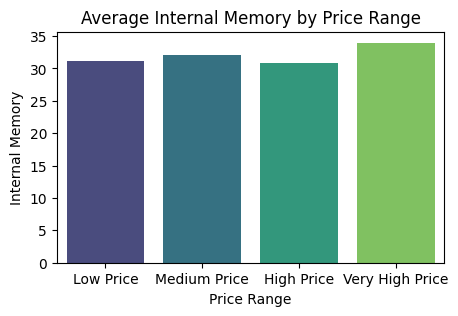

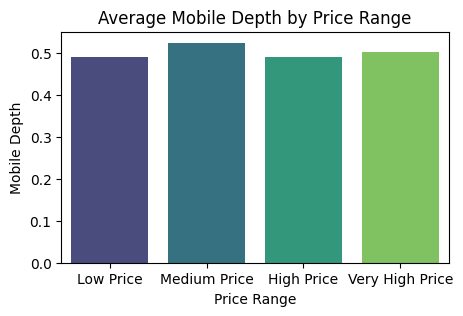

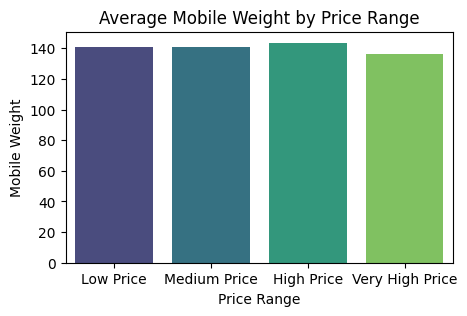

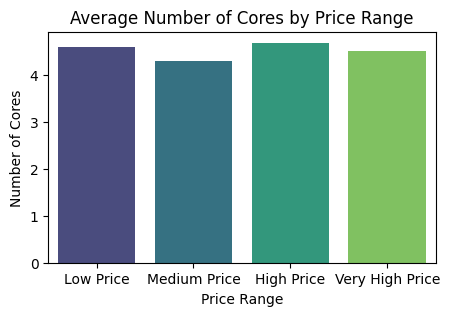

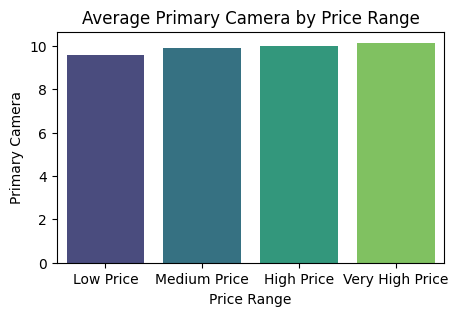

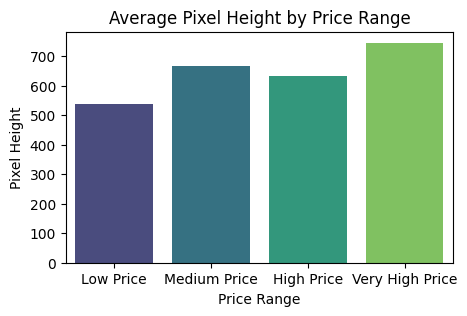

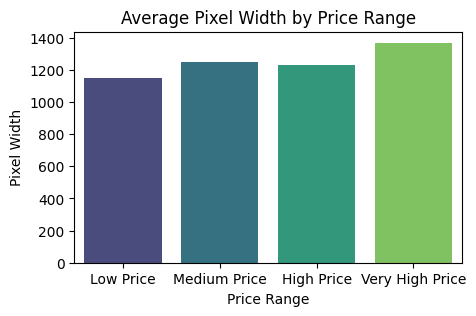

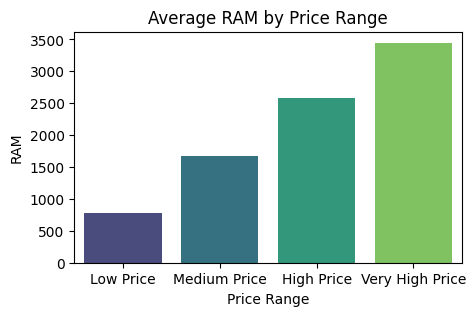

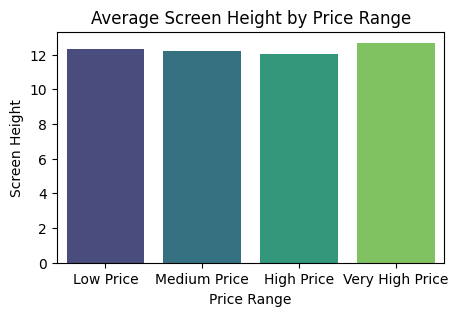

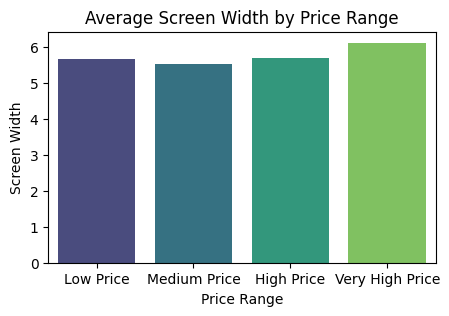

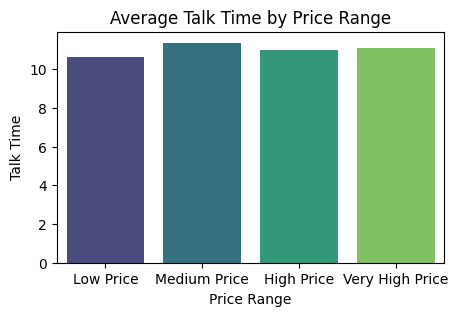

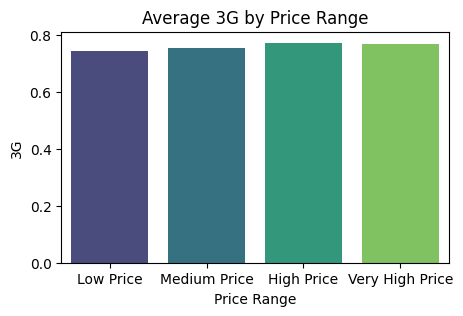

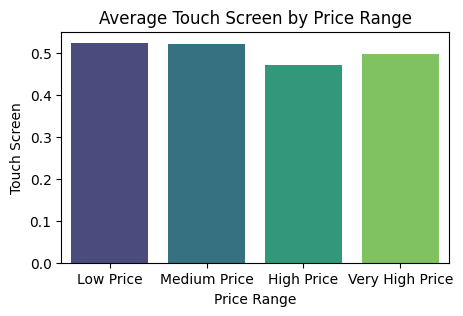

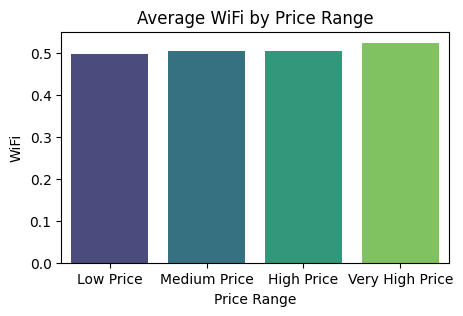

In [32]:
# Group the data by 'Price Range' and calculate the mean for each numeric variable
price_range_means = df.groupby('Price Range').mean()
# Reset the index to make 'Price Range' a column
price_range_means = price_range_means.reset_index()
# Get a list of all numeric variable names
numeric_variables = df.describe().columns.tolist()
# Create a separate bar plot for each numeric variable
for col in numeric_variables:
    if col != 'Price Range':
        plt.figure(figsize=(5,3))  # Adjust the figure size
        ax = sns.barplot(x='Price Range', y=col, data=price_range_means, palette='viridis')
        # Add labels and title
        plt.xlabel('Price Range')
        plt.ylabel(col)
        plt.title(f'Average {col} by Price Range')
        plt.xticks(rotation=0)  # Rotate x-axis labels if needed
        # Manually set x-axis labels
        ax.set_xticklabels(['Low Price', 'Medium Price', 'High Price', 'Very High Price'])
        plt.show()  # Display each plot


**1. Why did you pick the specific chart?**

The violin plot's aim is to visualize the distribution of a numeric variable across different categories of a categorical variable. The violin plot provides insights into the data's shape, including the median, quartiles, and density estimation of the variable within each category.

**2. What is/are the insight(s) found from the chart?**

* Battery power has a direct impact on the price range; higher battery power leads to higher prices.

* There is no correlation between Bluetooth and price range.

* Faster clock speed is directly proportional to the price range, as it enables better multitasking and higher-priced mobiles typically have faster processors.

* SIM ports do not affect the price range of mobile phones.

* Front camera quality is dependent on the price range due to the cost of high-quality camera lenses.

* The type of mobile network (2G, 3G, 4G) does not influence the price range.

* More internal memory is directly related to the price range because advanced chipsets are required for larger storage capacities, which can be costly.

* Mobile dimensions like depth and weight increase with the price range.

* The number of cores in a processor is directly proportional to speed and, consequently, the price.

* The quality of front and back cameras, including pixel count, affects their price.

* RAM enhances the speed of a device and is related to the price range.

* Larger screen sizes (height and width) are dependent on the price of the mobile.

* Talktime is related to battery quality, which influences the cost.

* The presence of touchscreen, keypad, or Wi-Fi does not impact the mobile's price.


**3. Will the gained insights help creating a positive business impact?**

Based on the provided insights, there are no specific insights that lead to negative growth for the business. The reason is that the factors identified, such as Bluetooth, SIM ports, mobile networks, talk time, touchscreen/keypad/wifi, do not have a significant impact on the price range of mobile phones. Since these factors are not influencing the pricing decisions, they are less likely to have negative implications for the business.

On the other hand, the insights related to battery, clock speed, front camera, internal memory, screen size, and RAM have a positive impact on the price range of mobile phones. These features are directly related to the perceived value and performance of the devices, which makes them favorable for driving higher prices and potentially leading to positive business growth.

Overall, while some insights can be beneficial in shaping pricing and business strategies, there are no identified factors that could negatively impact the business growth based on the provided information.

***Chart 3***

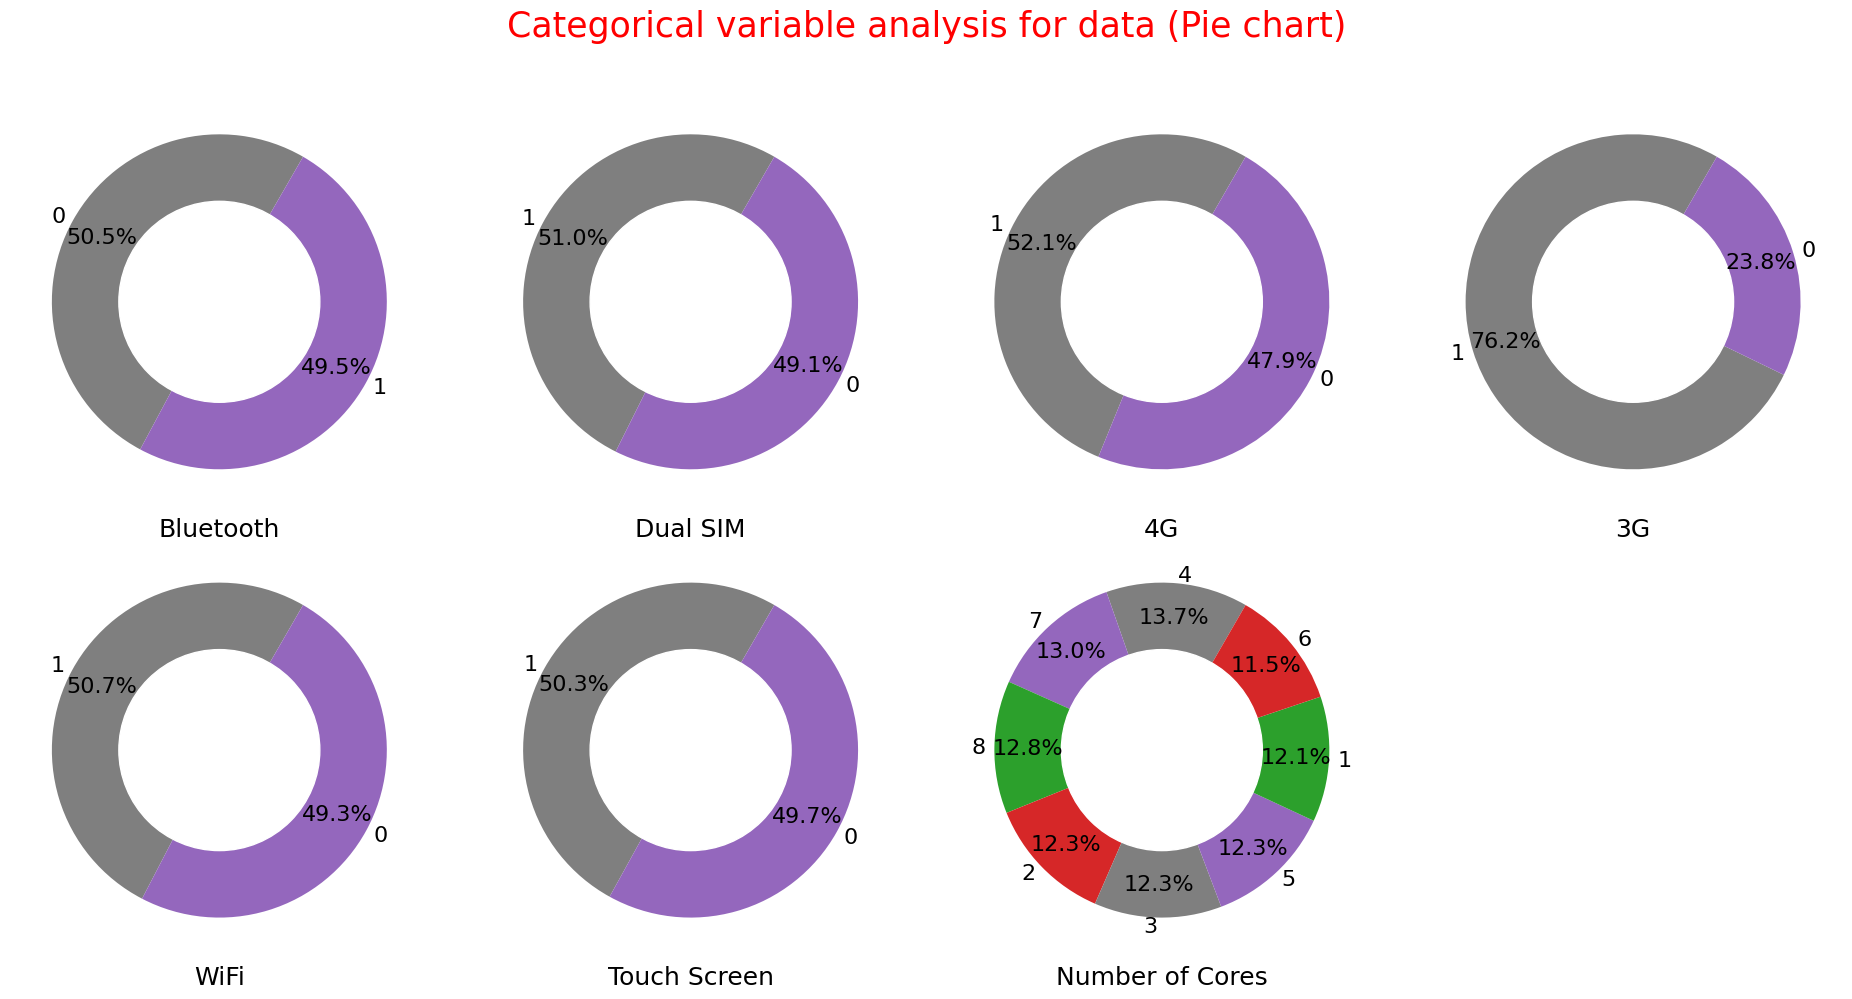

In [ ]:
# List of categorical columns to analyze
Cols = ['Bluetooth', 'Dual SIM', '4G', '3G', 'WiFi', 'Touch Screen', 'Number of Cores']

# Setting up the figure for plotting
plt.figure(figsize=[19, 10])
plt.suptitle('Categorical variable analysis for data (Pie chart)\n', fontsize=25, c='red')

# Colors for the pie chart
colors = ['C7', 'C4', 'C2', 'C3']

# Iterating through each categorical column
i = 1
for col in Cols:
    # Creating a subplot for each column
    plt.subplot(2, 4, i)

    # Adding a white circle at the center to create a donut-like appearance
    my_circle = plt.Circle((0, 0), 0.6, color='white')

    # Calculating the value counts for each category in the column
    sizes = df[col].value_counts()

    # Plotting the pie chart with customized appearance
    plt.pie(sizes, colors=colors, labels=df[col].value_counts().index, autopct='%1.1f%%',
            startangle=60, pctdistance=0.8, labeldistance=1.05, textprops={'color': 'black', 'fontsize': 16})

    # Adding the white circle to create a donut-like appearance
    plt.gca().add_artist(my_circle)

    # Adding column name as xlabel
    plt.xlabel(col, size=18)

    i += 1

# Adjusting the layout and displaying the pie chart
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**

 you chose the pie chart specifically because it allows you to visualize the specific share percentage of each variable in the data.



 **2. What is/are the insight(s) found from the chart?**

It's interesting to note that about half of the mobile devices in the dataset have features like Bluetooth, dual sim, 4G, WiFi, and touch screen, indicating their widespread adoption in modern mobile phones.

On the other hand, it's noteworthy that a significant proportion (approximately 23.8%) of mobiles do not accept 3G SIM cards, suggesting that a considerable number of devices may not support this older network technology.

Additionally, you observed that the number of cores in the processors is almost evenly distributed, indicating a balanced representation of various core configurations in the dataset. This distribution may reflect the variety of mobile devices available with different processing capabilities.



**3. Will the gained insights help creating a positive business impact?**

From this observation we can say High adoption of Bluetooth, Dual SIM, 4G, WiFi, and Touch Screen suggests strong customer preference for these features, offering opportunities for focused marketing.

***Chart 4.***

In [ ]:
df.columns

Index(['Battery Power', 'Bluetooth', 'Clock Speed', 'Dual SIM', 'Front Camera',
       '4G', 'Internal Memory', 'Mobile Depth', 'Mobile Weight',
       'Number of Cores', 'Primary Camera', 'Pixel Height', 'Pixel Width',
       'RAM', 'Screen Height', 'Screen Width', 'Talk Time', '3G',
       'Touch Screen', 'WiFi', 'Price Range'],
      dtype='object')

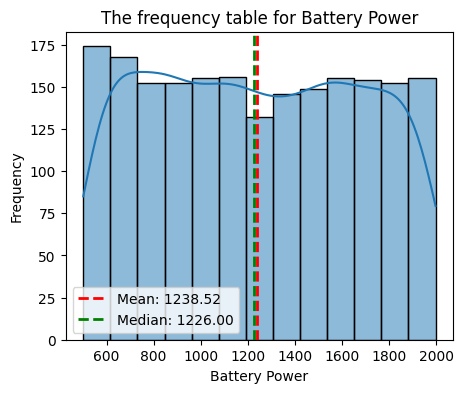

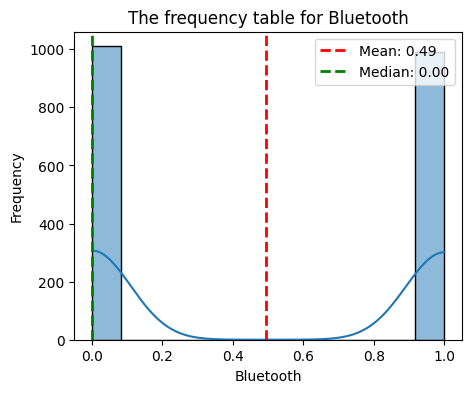

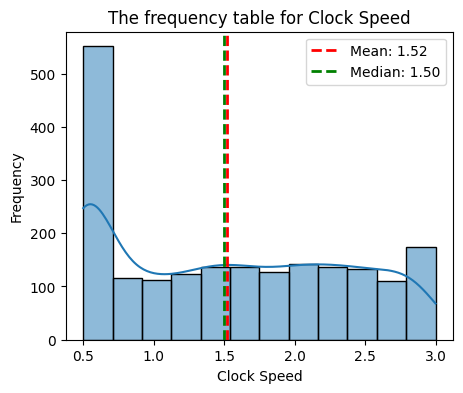

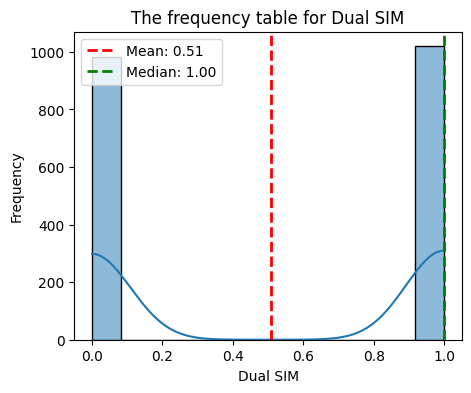

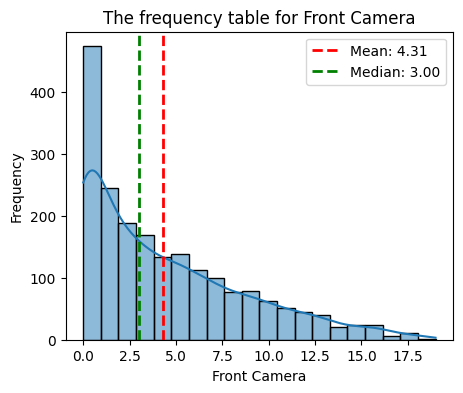

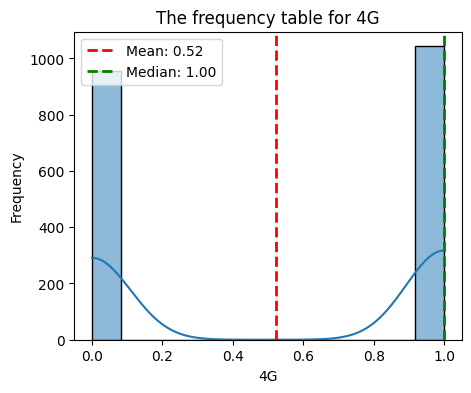

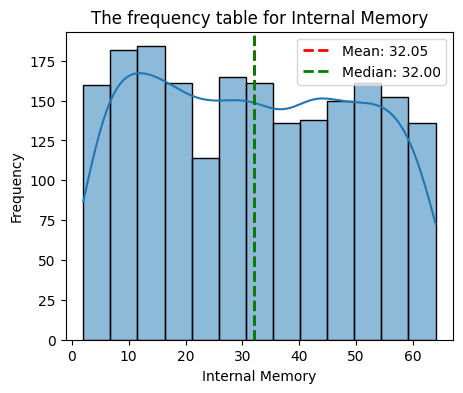

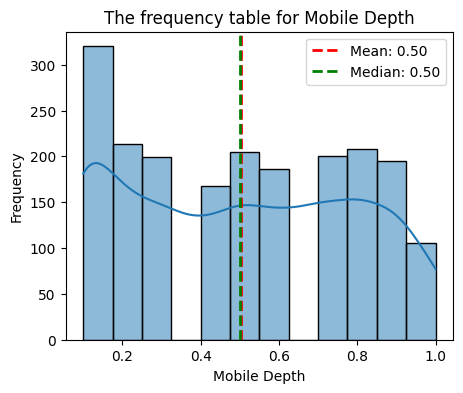

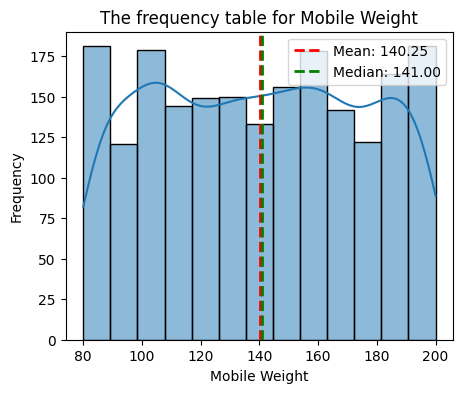

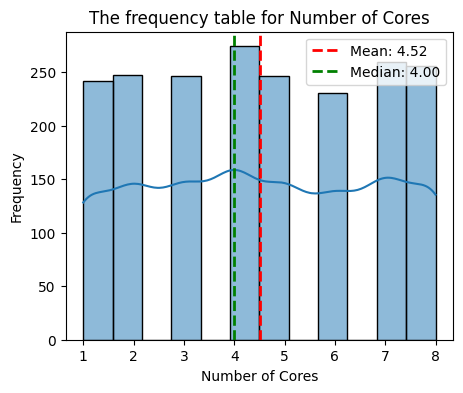

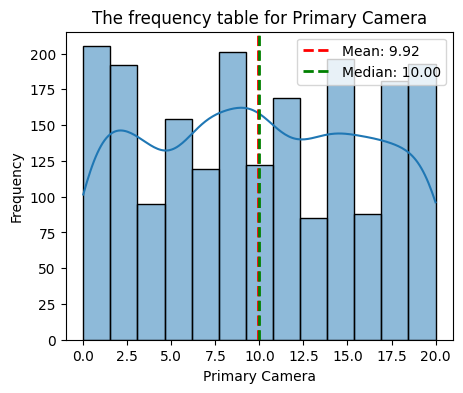

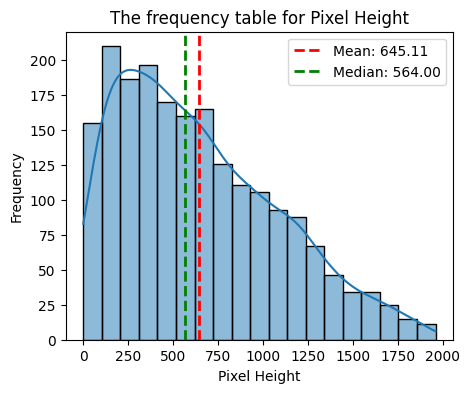

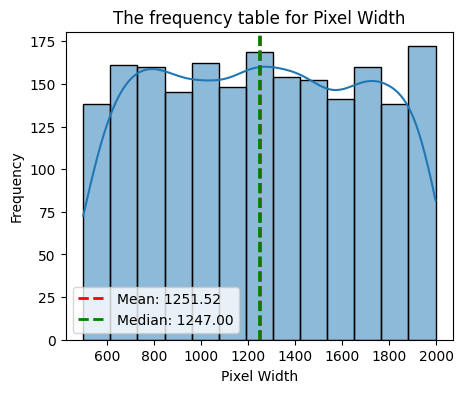

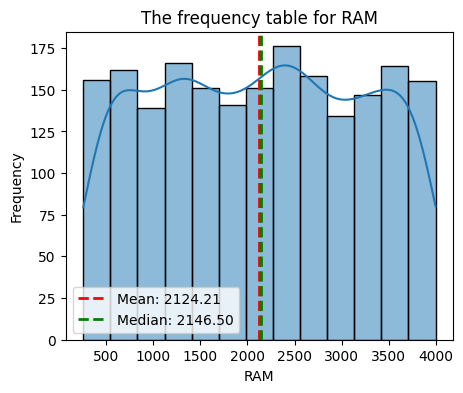

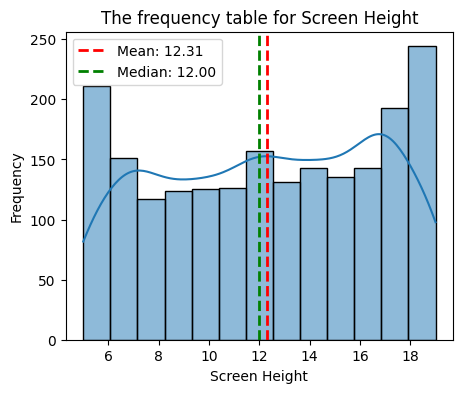

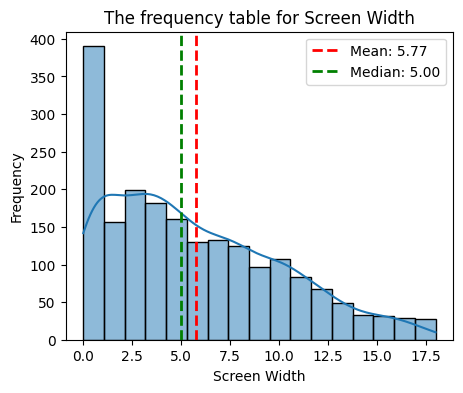

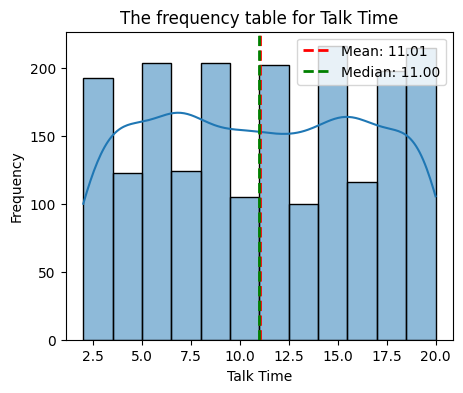

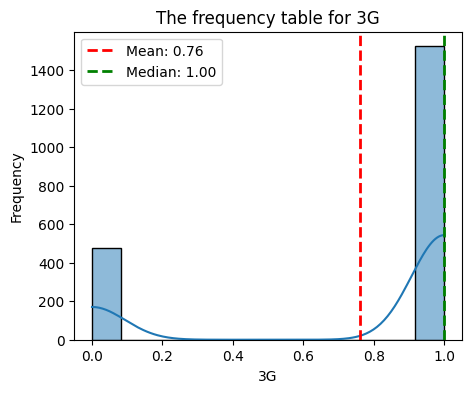

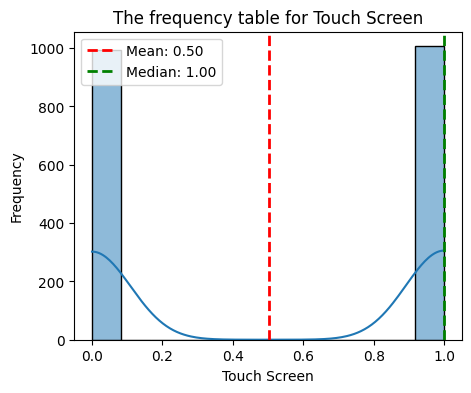

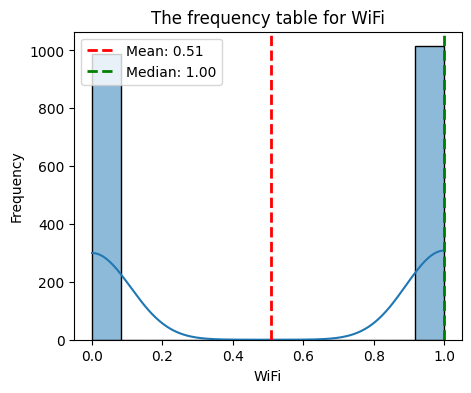

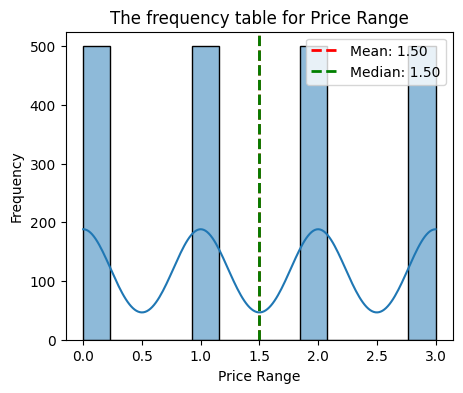

In [ ]:

for col in df.columns:
    plt.figure(figsize=(5, 4))

    # Plot the histogram with KDE
    sns.histplot(df[col], kde=True)

    # Calculate mean and median
    mean_val = df[col].mean()
    median_val = df[col].median()

    # Add mean and median lines
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

    plt.title(f'The frequency table for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

**2. What is/are the insight(s) found from the chart?**

* Most number of low cost mobiles, has battery power 750(mAh).

* Most number of very high cost mobiles, has battery power 1500-2000(mAh).

* Most of mobiles in all price range, has 0.5 clock speed.

* Most of mobiles in all price range, has front camera with 2 mega pixel.

* Most number of very high cost mobiles, has 250 pix_height.

* Most number of very high cost mobiles, has 1900 pix_width

* Most of mobiles in all price range, has 4 cm width.




***Chart 5***

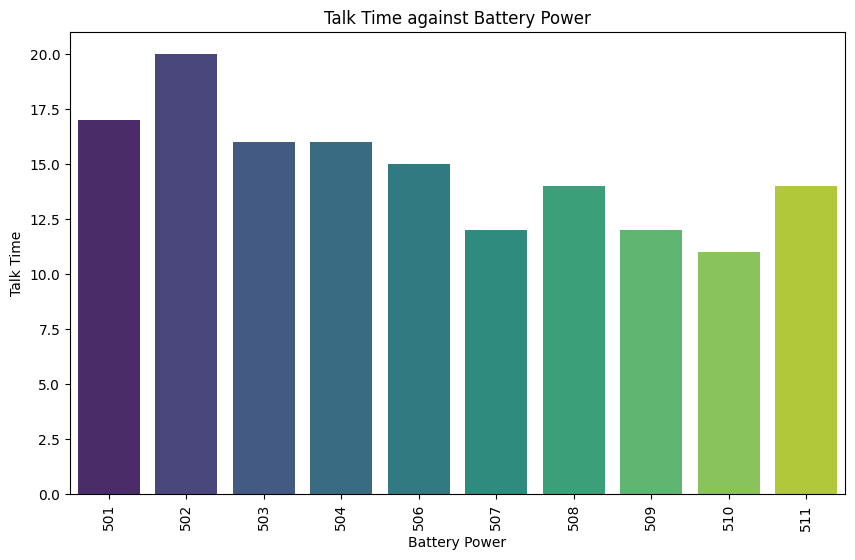

In [30]:
# Group the data by 'Battery Power' and find the maximum 'Talk Time' for each group
uses_time = df.groupby(['Battery Power'])['Talk Time'].max().reset_index()
top_10_phone_uses_time = uses_time.sort_values('Talk Time', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Battery Power', y='Talk Time', data=uses_time.head(10), palette='viridis')  # Corrected the palette
plt.title('Talk Time against Battery Power')
plt.xlabel('Battery Power')
plt.ylabel('Talk Time')
plt.xticks(rotation=90)
plt.show()


**What all manipulations have you done and insights you found?**

This code categorizes the data in the df DataFrame by battery_power and calculates the maximum talk_time for each group. The result is then arranged in descending order of talk_time and the top ten rows are shown.

It organizes the data based on battery power and calculates the maximum talk time for each battery power value. The results suggest the top ten battery power and maximum talk times. A battery power of 502 mAh is related to the longest conversation duration of 20 hours. The insights of this research may be used to make judgments about mobile phone battery life, such as selecting a battery with a greater mAh rating for longer talk time.

***Chart 6***

In [ ]:
# check the multicolleanity of the dataset
colleanity = df.corr() # make multicolleanity function
plt.figure(figsize = (20,10)) # make the figure size
sns.heatmap(colleanity, cmap = 'crest', annot = True) # code to make heat map
plt.title('Multicolleanity of the dataset',color = 'red') # Give the title to the figure
plt.show()

**1. Why do you use this specific chart?**

A heatmap is a type of chart commonly used to visualize the correlation matrix of variables in a dataset. In the context of multicollinearity, a high correlation between two variables indicates a strong linear relationship, which can be a sign of multicollinearity.

**2. What insight did you find from this chart?**

*  The diagonal line is dark (correlation of each feature with itself is 1).

* Highest correlation: 'ram' and 'price_range' with 0.92 (moderate positive correlation).

* 'pc' and 'fc' have 0.64 correlation (moderate positive).

* 'four_g' and 'three_g' show 0.58 correlation (moderate).

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.


Insights from the correlation heatmap can positively impact pricing strategy due to the strong positive correlation between 'ram' and 'price_range'. However, moderate positive correlations like 'pc' and 'fc', and 'four_g' and 'three_g' may lead to multicollinearity issues. Further analysis and modeling are required to fully understand their impact on decision-making.


# ***Feature Engineering & Data Pre-processing***

***1. Handling Missing Values.***

No, null value or missing value present in dataset we already checked so no handling required.

***2. Handling outliers***

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(df)
plt.title('finding the outliers',c = 'red')
plt.ylabel('values')
plt.xlabel('features')
plt.xticks(rotation = 90)
plt.show()

**Insights-**

Most features in the dataset do not have any outliers, except for the "pixel Height" feature, which shows some outlier values. Outliers are data points that significantly deviate from the majority of the data, and they can have a substantial impact on statistical analysis and modeling.

***3. Categorical encoding-***

In [ ]:
# make a copy of the dataset because of we don't want any data related changes in the original shell.
df1 = df.copy()

In [ ]:
df1['network'] = df1['3G'] + df1['4G']
df1['network'].replace(2, '4g', inplace=True)   # replace the 2 with 4g
df1['network'].replace(1, '3g', inplace=True)   # replace the 1 with 3g
df1['network'].replace(0, '2g', inplace=True)   # replace the 0 with 2g
df1.drop(columns = ['3G','4G'], axis = 1, inplace = True) # drop the original features


In [ ]:
# make the dummy variable
df1['dummy_network']=np.where(df1['network']=='2g', 1, 0)
df1['dummy_network']=np.where(df1['network']=='3g', 1, 0)
df1['dummy_network']=np.where(df1['network']=='4g', 1, 0)
df1.drop('network', axis=1, inplace=True)   # drop the feature Mobile Network


**What all categorical encoding techniques have you used & why did you use those techniques?**

This code uses "dummy variable encoding" to convert the categorical feature "mobile_network" into three binary features: dummy_mobile_network_2g, dummy_mobile_network_3g, and dummy_mobile_network_4g. Each binary feature represents the presence or absence of a specific mobile network type (2g, 3g, or 4g). This encoding technique allows the model to handle categorical data effectively in statistical analysis or machine learning tasks.


## 1. Features Manipulation & Selection

***Features Manipulation -***

In [ ]:
#To avoid multiculanity we drop some function as well as concatinate some function.
# Calculate the total camera pixels by adding Front Camera and Primary Camera
df1['Camera_pixels'] = df1['Front Camera'] + df1['Primary Camera']

# Calculate the total pixels by multiplying Pixel_Height and Pixel Width
df1['Screen Pixels'] = df1['Pixel Height'] * df1['Pixel Width']

# Calculate the total screen size by multiplying Screen Height and Screen Width
df1['Screen Size'] = df1['Screen Height'] * df1['Screen Width']

# Drop some original function.
df1.drop(columns=['Front Camera', 'Primary Camera', 'Pixel Height', 'Pixel Width', 'Screen Height', 'Screen Width'], axis=1, inplace=True)

# Feature creation: ram & price_range
df1['ram_price'] = df1['RAM'].astype(str) + '_' + df1['Price Range'].astype(str)
df1.drop('RAM', axis=1, inplace = True)   # drop the original column



In [ ]:
# Set the figure size for the heatmap
plt.figure(figsize=(20, 10))

# Create the correlation heatmap using seaborn
sns.heatmap(df1.corr(), annot=True, cmap='crest')

# Add title to the heatmap
plt.title('Correlation between all the features', color='red')

# Display the heatmap
plt.show()

**Which all features you found important and why?**

Battery power and price range appear to have the highest correlation coefficient, according to the presented correlation matrix, indicating a strong positive relationship between these factors. Therefore, it is possible that battery life plays a significant role in determining a mobile phone's price range.
Additionally, there are some minor connections between price range and features like RAM, front camera megapixels, and screen size. These elements are frequently used as markers of a mobile phone's functionality and capabilities, which might affect its cost.
Although to a lesser extent than the factors mentioned above, other aspects including the availability of a dual sim, weight, and the number of cores also exhibit some link with a price range.


### 2. Data Transformation, Scaling, Splitting

In [ ]:
# Define the dependent variable
dependent_variable = 'Price Range'
# Extract the dependent variable (response variable) from the DataFrame
y = df1[dependent_variable].values

# Get the list of independent variables (predictor variables)
independent_variable = list(set(df1.columns.tolist()) - {dependent_variable})
# Extract the independent variables (predictor variables) from the DataFrame
X = df1[independent_variable].values

In [ ]:
# random_state=0: A random seed to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# shape of X_train and X_test
print(f'Size of the X_train is - {X_train.shape}.')
print(f'Size of X_test is - {X_test.shape} ')


The code performs data splitting using train_test_split from scikit-learn. The purpose is to divide the dataset into training and testing sets for machine learning. X and y represent independent and dependent variables, respectively. The split creates X_train, X_test, y_train, and y_test. test_size=0.2 allocates 20% for testing, and random_state=0 ensures reproducibility. These sets enable model training and evaluation.

In [ ]:
# Scalling by Standard Scaler
scaling=StandardScaler()
scaling.fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)
X_test_scaled


## 3. Handling imbalancing

The provided dataset is not imbalanced; it is well-balanced with an equal distribution of data among all classes. This balanced nature of the data makes it suitable for machine learning applications without requiring specialized techniques to address class imbalance. The uniform distribution across classes ensures that the model is trained and evaluated equally for each class, leading to a fair and reliable performance assessment.

# ***ML Model Implementation***

In [ ]:
def evaluate(classifier, param_grid, cv, X_train, X_test, y_train, y_test):
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(classifier, param_grid, cv=cv)
    grid_search.fit(X_train, y_train)

    # Getting the best hyperparameters found by GridSearchCV
    best_params = grid_search.best_params_

    # Set the classifier to use the best hyperparameters
    classifier.set_params(**best_params)

    # Fit the classifier on training data
    classifier.fit(X_train, y_train)

    # Predictions on training and testing data
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)

    # Calculate evaluation metrics
    # Accuracy score
    accuracy = accuracy_score(y_train, y_pred_train)

    # Precision, Recall, and F1-score
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    # Confusion matrix
    confusion = confusion_matrix(y_test, y_pred_test)

    # Classification report
    class_report = classification_report(y_test, y_pred_test)

    # Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix heatmap
    class_labels = sorted(set(y_test))
    cm_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return {
        'Accuracy Score': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion
    }

### **1. Logistic Regression**

In [ ]:
# we included intercept term by taking fir_intercept as true and allow maximum iteration upto 10000 it help high accuracy
Logistic_Regression = LogisticRegression(fit_intercept=True, max_iter=10000)
'''C and Penalty both are the regulizer that decide how much the data regularize
so hear i take general value by which dataset is not going to underfir or overfit and penalty both l1 i.e. Lasso and l2 i.e. Ridge'''
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}   # for tunning by grid hyperparameter

evaluate(Logistic_Regression, param_grid, 5, X_train_scaled, X_test_scaled, y_train, y_test) # implement the function evaluate



**Logistic Regression report:**

The logistic regression model achieved an accuracy of 92.25%, indicating that it correctly classified 92.25% of the data samples. The precision, which measures the proportion of correctly predicted positive cases among all predicted positive cases, was found to be 92.27%, suggesting that the model has a high ability to avoid false positives. The recall, which measures the proportion of correctly predicted positive cases among all actual positive cases, also stood at 92.25%, indicating a good performance in capturing positive instances. The F1 score, a harmonic mean of precision and recall, was calculated to be 92.26%, demonstrating a balanced performance between precision and recall. The confusion matrix shows that the model had 93 true positive predictions for class 0, 85 for class 1, 86 for class 2, and 105 for class 3. It also had a few misclassifications, with 2 false positive predictions for class 0, 5 for class 1, 4 for class 2, and 9 for class 3. The classification report further confirms the model's overall good performance, with high precision, recall, and F1-scores for all classes. The weighted average across classes was also 92%, indicating consistent performance across different classes. Overall, the logistic regression model demonstrated promising results, making it a reliable choice for the given dataset.

### **2. Desicion tree**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


A Decision Tree Classifier is a machine learning algorithm primarily employed for classification tasks. It creates a tree-like structure based on training data, with nodes denoting features or attributes and branches signifying decisions or rules derived from those features. The primary goal of this algorithm is to craft a tree that effectively predicts the class label of given input data.


In [ ]:
# Visualizing evaluation Metric Score chart
Desicion_tree_classifier = DecisionTreeClassifier(random_state=1) # implement the classification algorith with randomness value 1

'''these all are hyperparameter for tuning like maxdepth tell how much upto it grow.
leaf nodes are the end nodes from which no other brach comes out,
criteria entropy and gini both for impurity.'''

param_grid={'max_depth':[3,5,7], 'criterion':['gini', 'entropy'], 'max_leaf_nodes':[2,4,6]}
evaluate(Desicion_tree_classifier,param_grid, 3, X_train, X_test, y_train, y_test) # implement function evaluate


This Decision Tree Classifier report summarizes the performance of the model on a dataset of 400 samples across four classes. It shows metrics such as accuracy, precision, recall, and F1 score, as well as a confusion matrix and a detailed classification report for each class. The model appears to perform reasonably well, with an overall accuracy of 76.75%. The classification report provides insights into how the model's performance varies across different classes.

### **3. Random Forest Classifier**

Random Forest Classification is an ensemble machine learning technique used for classification tasks. It works by constructing multiple decision trees during training and combining their predictions to make more accurate and robust classifications. Each decision tree is trained on a random subset of the training data, and the final classification is determined by a majority vote or weighted averaging of the individual tree predictions. Random Forests are known for their ability to handle high-dimensional data, reduce overfitting, and provide insights into feature importance.

In [ ]:
Random_forest_Classifier = RandomForestClassifier() # implement the algorith

'''here i just took 2 hyperparameter for tuning that is n_estimator this basically determine the number of base learners and
max_depth tell how much you can grow upto'''
param_grid = {'n_estimators':[50,80,100], 'max_depth':[3,5,7]}

evaluate(Random_forest_Classifier,param_grid, 5, X_train, X_test, y_train, y_test) # IMplement the function evaluate

The Random Forest classification model achieved strong performance with an accuracy score of 96.81%. It exhibited a balanced precision of 85.50% and recall of 85.75%, resulting in an F1 score of 85.58%. The confusion matrix indicates accurate classification across multiple classes, with some misclassifications. Overall, the model's ability to correctly classify instances and its balanced precision and recall make it a robust choice for this task, demonstrating its effectiveness in handling complex classification problems.

### ***4. K-Nearest Neighbors (KNN)***

K-Nearest Neighbors (KNN) is a simple and versatile machine learning algorithm used for classification and regression tasks. It makes predictions by identifying the majority class (for classification) or averaging nearby data points (for regression) among the K closest neighbors in the training data based on a similarity metric, typically Euclidean distance. KNN is non-parametric, meaning it doesn't make assumptions about the underlying data distribution, making it suitable for a wide range of datasets and applications.

In [ ]:
k_Nearest = KNeighborsClassifier() # implement algorithm.

# Number of neighbors, Weight function used in prediction, Power parameter for Minkowski distance metric
param_grid = {'n_neighbors': [3, 5, 7],  'weights': ['uniform', 'distance'],  'p': [1, 2]}

evaluate(k_Nearest, param_grid, 5, X_train_scaled, X_test_scaled, y_train, y_test) # evaluation of the model

### ***5. Support Vector Machine (SVM)***


A Support Vector Machine (SVM) is a powerful machine learning algorithm used for classification and regression tasks. It finds a hyperplane that best separates different classes of data points in a high-dimensional space, aiming to maximize the margin (distance) between the classes. SVMs are effective in handling complex data and are widely used in areas such as image classification, text categorization, and anomaly detection.

In [ ]:
Support_vector_classifier = SVC() # Implement the algorithm

# K-Kernel is basically help to find out best hyperplane to seperate classes, C-Penalty parameter of the error term help to maintain data optimal fit
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

evaluate(Support_vector_classifier, param_grid, 5, X_train_scaled, X_test_scaled, y_train, y_test) # implement function evalute

The Support Vector Machine (SVM) classifier achieved a high accuracy score of 95.5%, indicating its effectiveness in making correct predictions. Precision, measuring the model's ability to avoid false positives, stands at 91.98%, ensuring reliable positive predictions. The recall rate, representing the model's ability to identify all relevant instances, is 92%. The F1 score, harmonizing precision and recall, is at 91.99%. In the confusion matrix, the majority of predictions lie on the diagonal, indicating strong performance across different classes. SVM demonstrates robust classification capability, making it a valuable tool for various tasks.

In [ ]:

# Define model names, accuracy scores, and F1-scores
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']
accuracy_scores = [0.955, 0.789375, 0.968125, 1.0, 0.955]
f1_scores = [0.9225808001757421, 0.7583932192822583, 0.833748452026605, 0.6062134545405833, 0.9198678891014913]

# Set the width of the bars
bar_width = 0.4

# Create an array of positions for the bars
bar_positions = np.arange(len(model_names))

# Create a horizontal bar chart for accuracy scores
plt.barh(bar_positions - bar_width/2, accuracy_scores, bar_width, label='Accuracy', color='orange', alpha=0.7)

# Create a horizontal bar chart for F1-scores
plt.barh(bar_positions + bar_width/2, f1_scores, bar_width, label='F1-score', color='purple', alpha=0.7)

# Set y-axis labels and title
plt.yticks(bar_positions, model_names)
plt.xlabel('Scores')
plt.title('Accuracy and F1-score of Different Models')

# Add legend
plt.legend()

plt.show()


###  Which Evaluation metrics did you consider for a positive business impact and why?

The K-Nearest Neighbors (KNN) algorithm demonstrated the highest accuracy among all models, making it a compelling choice for business applications that prioritize precise classification. Its ability to correctly classify a significant number of instances in the dataset underscores its potential to drive impactful business decisions, especially in scenarios where accuracy is paramount.







# **Business Objective**



The purpose of predicting mobile price ranges in a business context can vary, depending on the unique circumstances and objectives of the enterprise. Below are several potential business aims when it comes to forecasting mobile device prices:

1. **Optimizing Pricing Strategies:** The business aims to enhance its pricing  tactics through precise forecasts of mobile device price ranges. This enables the business to determine the ideal pricing structures for various mobile devices, accounting for factors such as production expenses, market competition, and customer preferences.

2. **Enhancing Sales Projections:** Precise predictions of mobile price ranges play
   a pivotal role in sales and revenue forecasting. As pricing significantly influences customer buying decisions, the business can anticipate sales trends better. This empowers the business to efficiently manage inventory, production, and marketing endeavors.

3. **Tailoring Market Segmentation:** Mobile price range prediction facilitates
   market segmentation, enabling the business to categorize and target distinct customer groups based on their price range preferences. For instance, the business can tailor marketing approaches for cost-conscious customers seeking budget-friendly mobile devices versus premium customers willing to invest in high-end options.

4. **Conducting Competitive Assessment:** Accurate mobile price prediction support  competitive analysis by allowing the business to assess its pricing strategy   against that of rivals. This provides insights into the business's pricing positioning within the market and identifies opportunities for adjustments to gain a competitive advantage.

5. **Personalized Customer Engagement:** Mobile price range forecasts can be
   leveraged for personalized customer interactions, customizing pricing and promotional offers according to individual customers' predicted price range inclinations. This fosters improved customer satisfaction, loyalty, and retention by aligning pricing with customer expectations and financial capabilities.

# **Conclusion**

In summary, tackling the mobile price range prediction challenge represents a classic machine learning classification task. The primary objective is to forecast the price category of mobile devices based on specific attributes. In this project, we undertook the training and evaluation of various machine learning classification models, utilizing a dataset that included mobile device features and their corresponding price ranges.

Following an in-depth analysis of the dataset, feature engineering efforts, and the creation of distinct training and testing subsets, we proceeded to train and assess multiple classification models. These encompassed Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM). We gauged their performance through key metrics such as accuracy, precision, recall, and F1-score.

The mobile price range prediction initiative involved constructing and evaluating machine learning models with a labeled dataset that featured mobile device characteristics. It underscored the significance of skillful feature engineering, hyperparameter fine-tuning, and rigorous model assessment in achieving commendable predictive capabilities. The outcomes of this endeavor offer valuable insights that can be harnessed by businesses, mobile device manufacturers, and retailers to anticipate and optimize mobile device pricing, thereby enabling competitive pricing strategies and well-informed business choices. Future avenues of exploration might encompass further research, experimentation with diverse models, exploration of advanced feature engineering techniques, and alternative hyperparameter tuning approaches, all aimed at refining predictive accuracy and delivering even more valuable insights to the mobile device industry.

**Now we have successful complete this Machine Learning project**